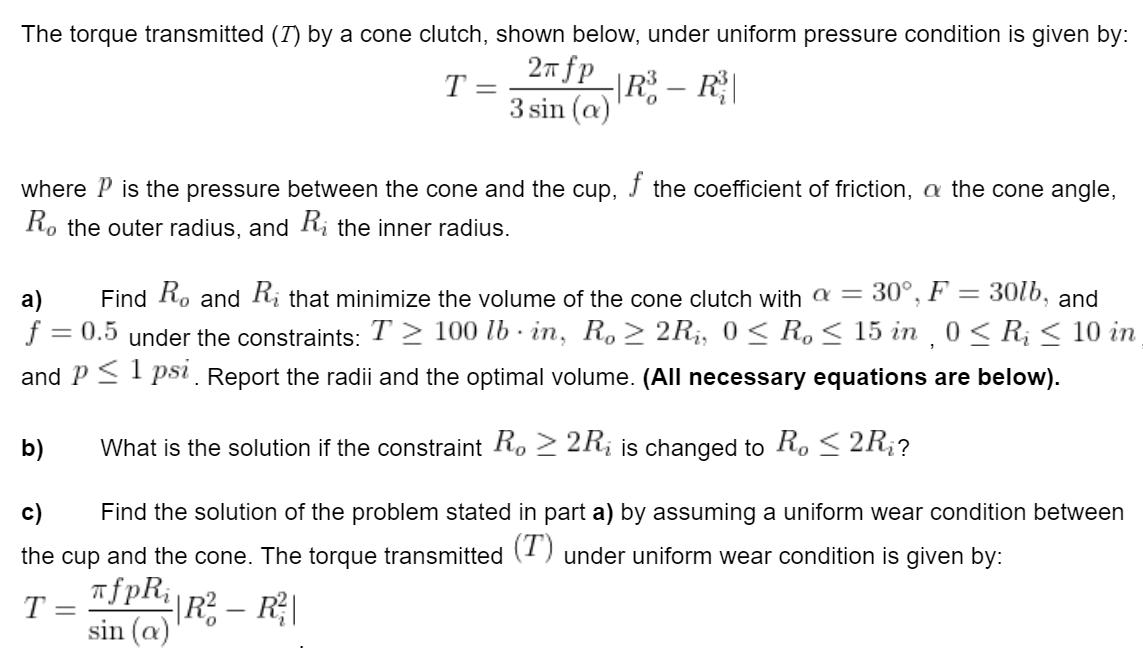

In [12]:
#import statements
import numpy as np
from scipy.optimize import minimize
import math

In [13]:
#objective function
def obj_funct(x):
    return (vol(x[0], x[1]))

#defining all relevant formulae
def area(R0, Ri):
    return ((math.pi) * (R0**2 - Ri**2))/math.sin(math.radians(30))

def pressure(F, A):
    if (A != 0):
        return F/A
    else:
        return 2

def torque(R0, Ri):
    p = pressure(30, area(R0, Ri))
    return ((2 * math.pi * 0.5 * p) * (abs(R0**3-Ri**3)))/(3 * math.sin(math.radians(30)))

def height(R0, Ri):
    return (R0 - Ri)/math.tan(math.radians(30))

def vol(R0, Ri):
    h = height(R0, Ri)
    return 1/3 * math.pi * h * (R0**2 + Ri**2 + R0*Ri)

In [14]:
#inequality constraints as laid out by part (a)
cons = ({'type': 'ineq', 'fun': lambda x:  torque(x[0], x[1])-100},
        {'type': 'ineq', 'fun': lambda x: x[0]-(2*x[1])},
        {'type': 'ineq', 'fun': lambda x: -pressure(30, area(x[0], x[1]))+1})

#domain of R0 and Ri (x[0] and x[1])
bnds = ((0, 15), (0, 10))

#final solution by minimizing objective function
sol = minimize(obj_funct, (15,10), method='SLSQP', bounds=bnds, constraints=cons)
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 999.4404660057593
       x: [ 8.571e+00  4.286e+00]
     nit: 3
     jac: [ 3.998e+02 -9.994e+01]
    nfev: 10
    njev: 3

In [15]:
#inequality constraints as laid out by part (b)
cons2 = ({'type': 'ineq', 'fun': lambda x:  torque(x[0], x[1])-100},
        {'type': 'ineq', 'fun': lambda x: (2*x[1])-x[0]},
        {'type': 'ineq', 'fun': lambda x: -pressure(30, area(x[0], x[1]))+1})

#final solution by minimizing objective function
sol = minimize(obj_funct, (15,10), method='SLSQP', bounds=bnds, constraints=cons2)
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 86.60254037844017
       x: [ 6.844e+00  6.486e+00]
     nit: 10
     jac: [ 2.549e+02 -2.289e+02]
    nfev: 35
    njev: 10

In [16]:
#required formula for torque transmitted under uniform wear condition
def torque2(R0, Ri):
    p = pressure(30, area(R0, Ri))
    return ((math.pi * 0.5 * p * Ri) * (abs(R0**2-Ri**2)))/(math.sin(math.radians(30)))

#inequality constraints as laid out by part (c)
cons3 = ({'type': 'ineq', 'fun': lambda x:  torque2(x[0], x[1])-100},
        {'type': 'ineq', 'fun': lambda x: x[0]-(2*x[1])},
        {'type': 'ineq', 'fun': lambda x: -pressure(30, area(x[0], x[1]))+1})    

#final solution by minimizing objective function
sol = minimize(obj_funct, (15,10), method='SLSQP', bounds=bnds, constraints=cons3)
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3761.9543623316417
       x: [ 1.333e+01  6.667e+00]
     nit: 5
     jac: [ 9.674e+02 -2.418e+02]
    nfev: 10
    njev: 3